In [1]:
import pandas as pd
csv_path = r"C:\Users\91887\OneDrive\Documents\twitter_training.csv"
df = pd.read_csv(csv_path)
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
df.dropna(subset=['im getting on borderlands and i will murder you all ,'], inplace=True)
df['im getting on borderlands and i will murder you all ,'] = df['im getting on borderlands and i will murder you all ,'].str.lower()

In [15]:
from textblob import TextBlob
df['polarity'] = df['Positive'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

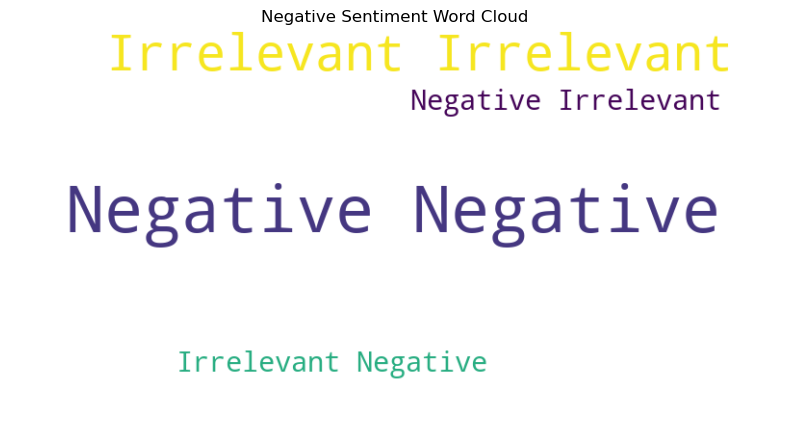

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
positive_words = ' '.join([text for text in df[df['sentiment'] == 'negative']['Positive']])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Word Cloud")
plt.show()

In [13]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 217.9 kB/s eta 0:00:03
   - ------------------------------------- 30.7/626.3 kB 217.9 kB/s eta 0:00:03
   -- ------------------------------------ 41.0/626.3 kB 178.6 kB/s eta 0:00:04
   ----- --------------------------------- 81.9/626.3 kB 305.0 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/626.3 kB 327.7 kB/s eta 0:00:02
   ------- ------------------------------ 122.9/626.3 kB 359.9 kB/s eta 0:00:02
   --------- ---------------------------- 163.8/626.3 kB 446.5 kB/s eta 0:00:02
   ----------- -------------------------- 194.6/626.3 kB 452.9 kB/s eta 0:00:01
   ------------- ------------------------ 225.3/626.3 kB 491.0 kB/s eta 0:

In [19]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 435.7 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/301.4 kB 435.7 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.4 kB 279.3 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/301.4 kB 363.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.4 kB 435.7 kB/s eta 0:00:01
   --------------------- ---------------- 174.1/301.4 kB 655.4 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/301.4 kB 758.5 kB/s eta 0:00:01
   -------------------------------------  297.0/301.4 kB 916.0 kB/s eta 0:00:01
   -------------------------------------- 301.4/301.4 kB 808.8 kB/s eta 0:00:00


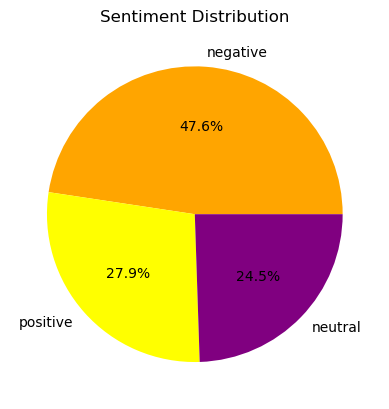

In [23]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'yellow', 'purple'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

In [25]:
import pandas as pd
import numpy as np
start_date = pd.to_datetime('2023-01-01')
num_entries = len(df)
date_range = pd.date_range(start=start_date, periods=num_entries, freq='D')
df['proxy_date'] = date_range
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",polarity,sentiment,proxy_date
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...,0.227273,positive,2023-01-01
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,0.227273,positive,2023-01-02
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,0.227273,positive,2023-01-03
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,0.227273,positive,2023-01-04
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,0.227273,positive,2023-01-05


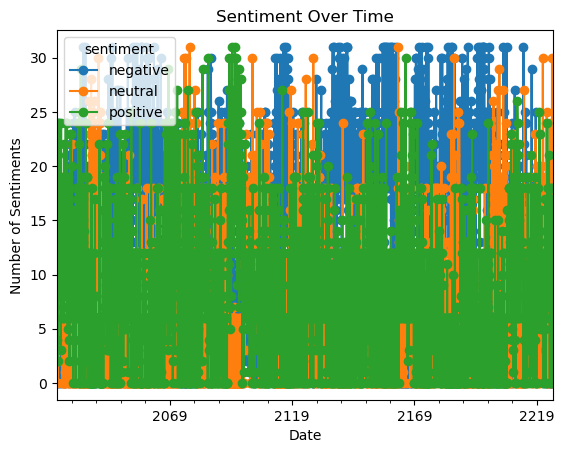

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
df['date'] = pd.to_datetime(df['proxy_date'])
sentiment_over_time = df.groupby([df['date'].dt.to_period('M'), 'sentiment']).size().unstack().fillna(0)
sentiment_over_time.plot(kind='line', marker='o')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sentiments')
plt.show()

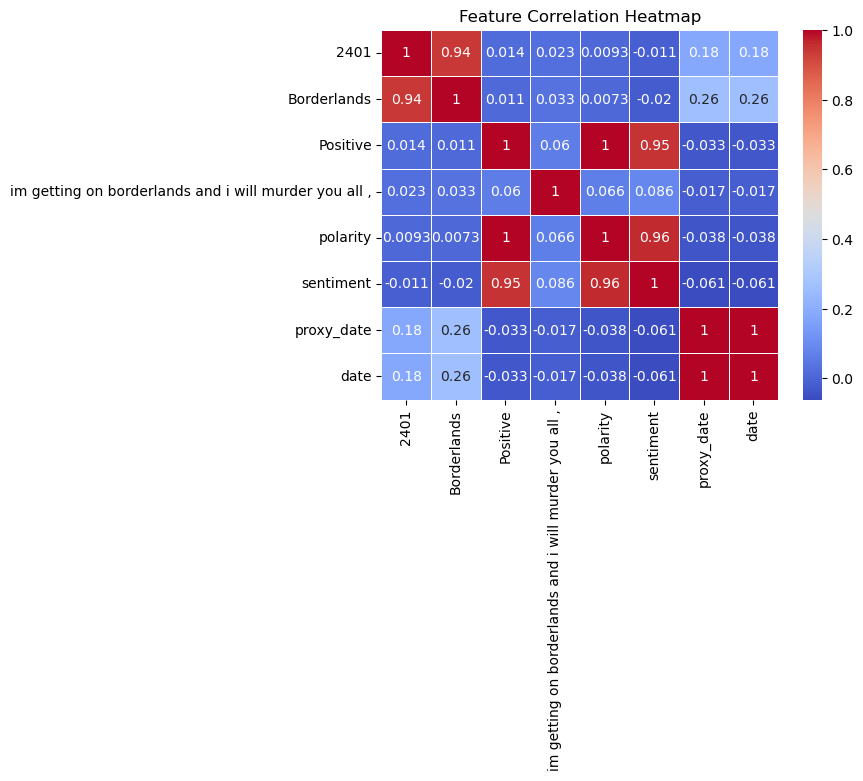

In [29]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df_encoded[column] = label_encoders[column].fit_transform(df_encoded[column].astype(str))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

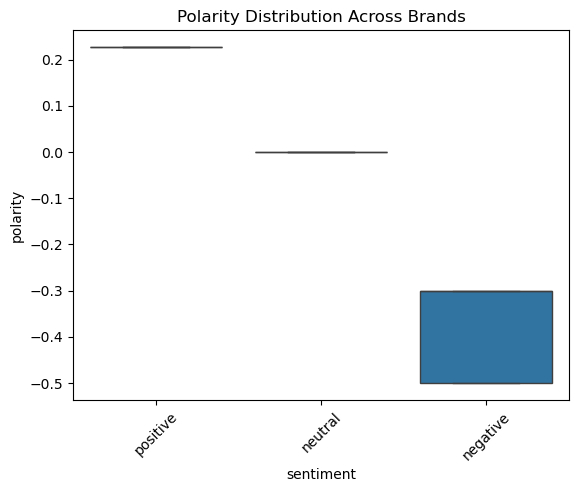

In [31]:
import seaborn as sns
sns.boxplot(x='sentiment', y='polarity', data=df)
plt.title('Polarity Distribution Across Brands')
plt.xticks(rotation=45)
plt.show()